In [1]:
import tensorflow as tf
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

2023-08-30 09:22:37.972995: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-30 09:22:38.034059: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-30 09:22:38.287381: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-30 09:22:38.288487: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-30 09:22:39.234674: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
n_samples = 1000

X, y = make_circles(n_samples,noise=0.03,random_state=42)

# check the feature x
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# check the feature y
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [4]:
X.shape, y.shape

((1000, 2), (1000,))

#### In order to understand the data better it's good to visualize the data

In [5]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "Label":y})

In [6]:
circles

,X0,X1,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


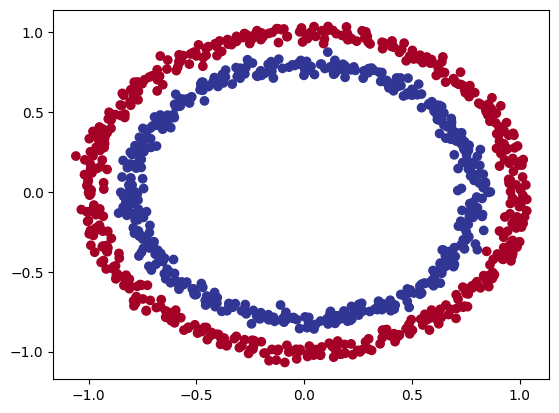

In [7]:
# Visualize using a plot
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

### Steps in Modeling
1. Create the model
2. compile the model
3. fit the model
4. Evaluate the model
5. Tweak the model for better performance
6. Evaluate the model

In [8]:
# set the random seed
tf.random.set_seed(42)

# create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])


model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy'])

model.fit(X,y,epochs=5)

Epoch 1/5


2023-08-30 09:22:41.251938: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


32/32 [==============================] - 0s 753us/step - loss: 5.1203 - accuracy: 0.4800
Epoch 2/5
32/32 [==============================] - 0s 597us/step - loss: 3.4712 - accuracy: 0.4860
Epoch 3/5
32/32 [==============================] - 0s 593us/step - loss: 0.7581 - accuracy: 0.5010
Epoch 4/5
32/32 [==============================] - 0s 671us/step - loss: 0.7116 - accuracy: 0.4980
Epoch 5/5
32/32 [==============================] - 0s 562us/step - loss: 0.6999 - accuracy: 0.5010


In [9]:
model.fit(X,y,epochs=200, verbose=0)

In [10]:
model.evaluate(X,y)

32/32 [==============================] - 0s 586us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

In [11]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

model_2.fit(X,y,epochs=100, verbose=0)

In [12]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 718us/step - loss: 0.6933 - accuracy: 0.5000


[0.6933019161224365, 0.5]

### Create  a new model_3 to have a better model from last 2 models

In [13]:
# set the random seed
tf.random.set_seed(42)

# create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3.fit(X,y, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 2.2600 - accuracy: 0.4630
Epoch 2/100
32/32 [==============================] - 0s 867us/step - loss: 0.7192 - accuracy: 0.5090
Epoch 3/100
32/32 [==============================] - 0s 841us/step - loss: 0.6953 - accuracy: 0.4910
Epoch 4/100
32/32 [==============================] - 0s 744us/step - loss: 0.6988 - accuracy: 0.5110
Epoch 5/100
32/32 [==============================] - 0s 798us/step - loss: 0.6983 - accuracy: 0.4870
Epoch 6/100
32/32 [==============================] - 0s 869us/step - loss: 0.6992 - accuracy: 0.4580
Epoch 7/100
32/32 [==============================] - 0s 809us/step - loss: 0.6967 - accuracy: 0.5180
Epoch 8/100
32/32 [==============================] - 0s 766us/step - loss: 0.6950 - accuracy: 0.5110
Epoch 9/100
32/32 [==============================] - 0s 776us/step - loss: 0.7004 - accuracy: 0.4910
Epoch 10/100
32/32 [==============================] - 0s 741us/step - loss: 0.6950 - accuracy

In [14]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 555us/step - loss: 0.7003 - accuracy: 0.5090


[0.7002701759338379, 0.5090000033378601]

In [15]:
model_3.predict(X)

32/32 [==============================] - 0s 699us/step


array([[0.47708672],
       [0.57547563],
       [0.5806746 ],
       [0.5821041 ],
       [0.4328555 ],
       [0.5870041 ],
       [0.56261545],
       [0.4710498 ],
       [0.48052454],
       [0.58262914],
       [0.5272457 ],
       [0.5252823 ],
       [0.57133734],
       [0.44568014],
       [0.44000518],
       [0.45776665],
       [0.5589618 ],
       [0.46171087],
       [0.5649554 ],
       [0.51553434],
       [0.4984585 ],
       [0.6029304 ],
       [0.45866066],
       [0.48079532],
       [0.6035419 ],
       [0.59048027],
       [0.5523933 ],
       [0.44983804],
       [0.45302022],
       [0.44321167],
       [0.48401934],
       [0.587959  ],
       [0.5599635 ],
       [0.4472835 ],
       [0.45916128],
       [0.60868394],
       [0.58689725],
       [0.5259841 ],
       [0.45389223],
       [0.5014975 ],
       [0.51080775],
       [0.5447991 ],
       [0.5242913 ],
       [0.44423157],
       [0.53811955],
       [0.5567848 ],
       [0.43986338],
       [0.544

### All of the preditctions are arround 0.5 but let's see this visually.

Lets create a plotting fuction called plot_decision_boundry(). This function will

1. Take in trained model, Feature X and labels y
2. create a meshGrid

In [16]:
import numpy as np

In [17]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
    y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    x_in = np.c_[xx.ravel(), yy.ravel()]

    y_pred = model.predict(x_in)

    y_pred = np.round(y_pred).reshape(xx.shape)

    plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())


313/313 [==============================] - 0s 471us/step


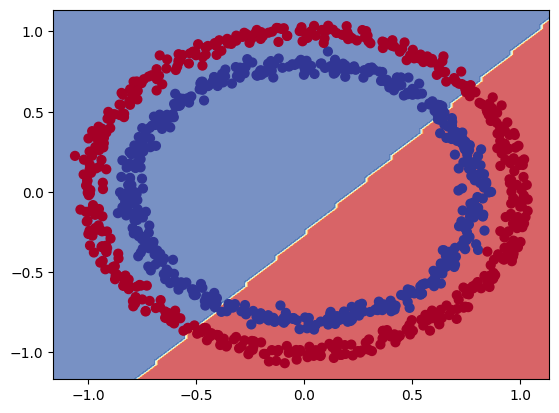

In [18]:
plot_decision_boundary(model=model_3,X=X,y=y)

In [19]:
x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1

x_min, x_max, y_min, y_max

(-1.1595024599098636,
 1.1337117525463376,
 -1.1677683182718437,
 1.1360036756154803)

In [20]:
np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

[array([[-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        ...,
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175]]),
 array([[-1.16776832, -1.16776832, -1.16776832, ..., -1.16776832,
         -1.16776832, -1.16776832],
        [-1.14449789, -1.14449789, -1.14449789, ..., -1.14449789,
         -1.14449789, -1.14449789],
        [-1.12122747, -1.12122747, -1.12122747, ..., -1.12122747,
         -1.12122747, -1.12122747],
        ...,
        [ 1.08946283,  1.08946283,  1.08946283, ...,  

## Lets see if our model can work with regression data

In [21]:
tf.random.set_seed(42)

X_regression = tf.range(1,1000, 5)
y_regression = tf.range(100,1100,5) 

# Relateion between X and Y is y = x + 100

# Lets split our data into test and train data
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:] 

# Reshape input data for the model
# X_reg_train = tf.reshape(X_reg_train, (-1, 1))  # Reshape to (batch_size, input_shape)
# y_reg_train = tf.reshape(y_reg_train, (-1, 1))  # Reshape to (batch_size, input_shape)


In [22]:
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

#### We have compiled our model for a classification problem now we are dealing with regression problem, lets create a model to work with our regression data

In [23]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_4.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=600)

Epoch 1/600
5/5 [==============================] - 0s 2ms/step - loss: 502.6290 - mae: 502.6290
Epoch 2/600
5/5 [==============================] - 0s 1ms/step - loss: 401.6639 - mae: 401.6639
Epoch 3/600
5/5 [==============================] - 0s 1ms/step - loss: 303.7752 - mae: 303.7752
Epoch 4/600
5/5 [==============================] - 0s 1ms/step - loss: 201.6712 - mae: 201.6712
Epoch 5/600
5/5 [==============================] - 0s 1ms/step - loss: 94.8170 - mae: 94.8170
Epoch 6/600
5/5 [==============================] - 0s 1ms/step - loss: 56.9112 - mae: 56.9112
Epoch 7/600
5/5 [==============================] - 0s 1ms/step - loss: 78.7286 - mae: 78.7286
Epoch 8/600
5/5 [==============================] - 0s 1ms/step - loss: 61.2397 - mae: 61.2397
Epoch 9/600
5/5 [==============================] - 0s 1ms/step - loss: 44.1364 - mae: 44.1364
Epoch 10/600
5/5 [==============================] - 0s 1ms/step - loss: 51.3419 - mae: 51.3419
Epoch 11/600
5/5 [==============================] -

In [24]:
y_reg_pred = model_4.predict(X_reg_test)

2/2 [==============================] - 0s 2ms/step


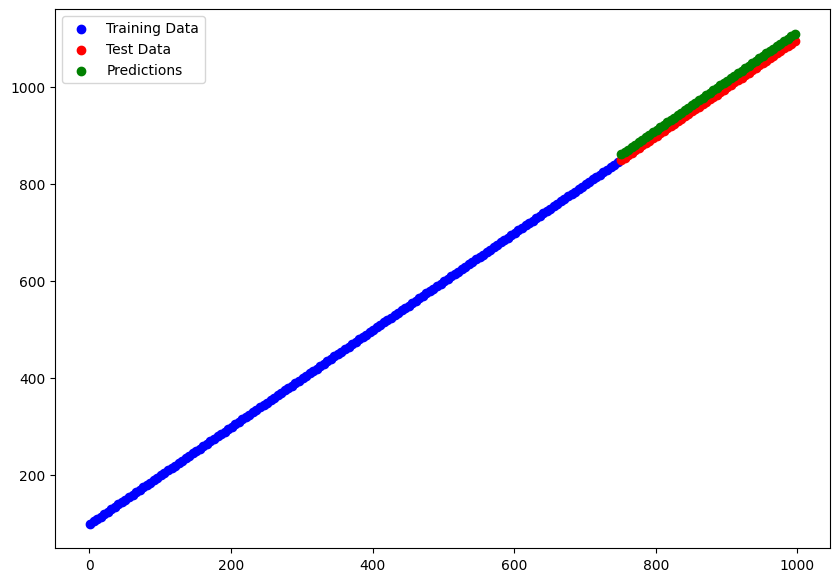

In [25]:
plt.figure(figsize=(10,7))

plt.scatter(X_reg_train,y_reg_train,c="b", label="Training Data")
plt.scatter(X_reg_test,y_reg_test, c='r', label="Test Data")
plt.scatter(X_reg_test,y_reg_pred, c='g', label="Predictions")
plt.legend()

## Non-Linearity

In [26]:
tf.random.set_seed(42)

# 1. Create a model

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, tf.keras.activations.linear)
])

model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 688us/step - loss: 4.8916 - accuracy: 0.4770
Epoch 2/100
32/32 [==============================] - 0s 626us/step - loss: 4.7223 - accuracy: 0.4740
Epoch 3/100
32/32 [==============================] - 0s 610us/step - loss: 4.5561 - accuracy: 0.4730
Epoch 4/100
32/32 [==============================] - 0s 577us/step - loss: 4.4935 - accuracy: 0.4720
Epoch 5/100
32/32 [==============================] - 0s 566us/step - loss: 4.4475 - accuracy: 0.4710
Epoch 6/100
32/32 [==============================] - 0s 572us/step - loss: 4.4315 - accuracy: 0.4710
Epoch 7/100
32/32 [==============================] - 0s 539us/step - loss: 4.4223 - accuracy: 0.4710
Epoch 8/100
32/32 [==============================] - 0s 530us/step - loss: 4.4148 - accuracy: 0.4720
Epoch 9/100
32/32 [==============================] - 0s 598us/step - loss: 4.4084 - accuracy: 0.4710
Epoch 10/100
32/32 [==============================] - 0s 603us/step - loss: 4.4029 - accura

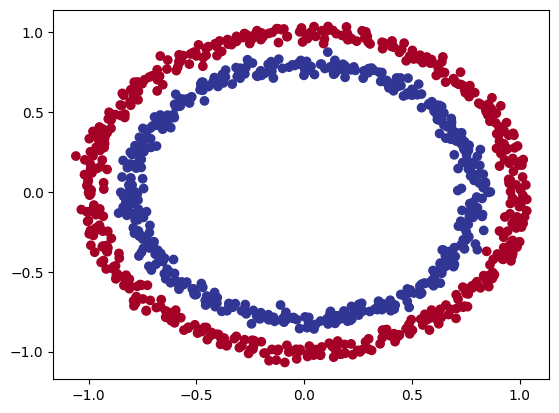

In [27]:
# Check our data
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 329us/step


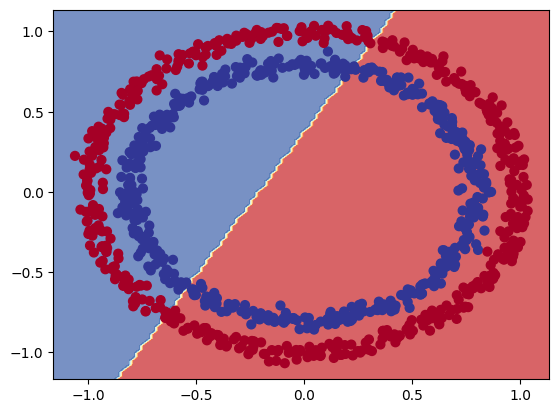

In [28]:
plot_decision_boundary(model_5,X,y)

# Lets build our first with a non-linear activation function

In [29]:
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model and save history
history = model_6.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 754us/step - loss: 4.3544 - accuracy: 0.4680
Epoch 2/100
32/32 [==============================] - 0s 608us/step - loss: 4.2767 - accuracy: 0.4700
Epoch 3/100
32/32 [==============================] - 0s 596us/step - loss: 4.2171 - accuracy: 0.4700
Epoch 4/100
32/32 [==============================] - 0s 572us/step - loss: 4.1696 - accuracy: 0.4690
Epoch 5/100
32/32 [==============================] - 0s 549us/step - loss: 4.1471 - accuracy: 0.4690
Epoch 6/100
32/32 [==============================] - 0s 531us/step - loss: 4.1066 - accuracy: 0.4700
Epoch 7/100
32/32 [==============================] - 0s 563us/step - loss: 4.0354 - accuracy: 0.4670
Epoch 8/100
32/32 [==============================] - 0s 604us/step - loss: 3.9863 - accuracy: 0.4670
Epoch 9/100
32/32 [==============================] - 0s 554us/step - loss: 3.9537 - accuracy: 0.4670
Epoch 10/100
32/32 [==============================] - 0s 551us/step - loss: 3.9049 - accura

## Now lets create a new model with more hidden layers and using a Non linear activation fucntion

In [30]:
tf.random.set_seed(42)

# 1. create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model and save the history
history = model_7.fit(X,y,epochs=250)

Epoch 1/250
32/32 [==============================] - 0s 815us/step - loss: 3.2124 - accuracy: 0.4320
Epoch 2/250
32/32 [==============================] - 0s 939us/step - loss: 2.6520 - accuracy: 0.3890
Epoch 3/250
32/32 [==============================] - 0s 740us/step - loss: 1.4714 - accuracy: 0.3880
Epoch 4/250
32/32 [==============================] - 0s 663us/step - loss: 1.0227 - accuracy: 0.3970
Epoch 5/250
32/32 [==============================] - 0s 635us/step - loss: 0.9835 - accuracy: 0.3920
Epoch 6/250
32/32 [==============================] - 0s 644us/step - loss: 0.9563 - accuracy: 0.3850
Epoch 7/250
32/32 [==============================] - 0s 638us/step - loss: 0.9333 - accuracy: 0.3880
Epoch 8/250
32/32 [==============================] - 0s 635us/step - loss: 0.9156 - accuracy: 0.3790
Epoch 9/250
32/32 [==============================] - 0s 631us/step - loss: 0.8990 - accuracy: 0.3800
Epoch 10/250
32/32 [==============================] - 0s 677us/step - loss: 0.8850 - accura

313/313 [==============================] - 0s 421us/step


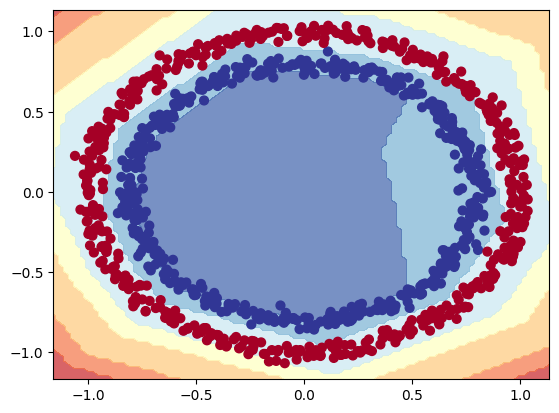

In [31]:
plot_decision_boundary(model_7, X,y)

In [32]:
tf.random.set_seed(42)

# 1. Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. compile the model
model_8.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model and save the results 
history = model_8.fit(X,y,epochs=200)

Epoch 1/200
32/32 [==============================] - 0s 792us/step - loss: 0.6898 - accuracy: 0.4930
Epoch 2/200
32/32 [==============================] - 0s 707us/step - loss: 0.6891 - accuracy: 0.5100
Epoch 3/200
32/32 [==============================] - 0s 693us/step - loss: 0.6885 - accuracy: 0.5090
Epoch 4/200
32/32 [==============================] - 0s 654us/step - loss: 0.6882 - accuracy: 0.5100
Epoch 5/200
32/32 [==============================] - 0s 615us/step - loss: 0.6877 - accuracy: 0.5090
Epoch 6/200
32/32 [==============================] - 0s 630us/step - loss: 0.6873 - accuracy: 0.5090
Epoch 7/200
32/32 [==============================] - 0s 610us/step - loss: 0.6867 - accuracy: 0.5140
Epoch 8/200
32/32 [==============================] - 0s 627us/step - loss: 0.6863 - accuracy: 0.5160
Epoch 9/200
32/32 [==============================] - 0s 613us/step - loss: 0.6859 - accuracy: 0.5160
Epoch 10/200
32/32 [==============================] - 0s 623us/step - loss: 0.6854 - accura

In [33]:
model_8.evaluate(X,y)

32/32 [==============================] - 0s 592us/step - loss: 0.3226 - accuracy: 0.8880


[0.3225875794887543, 0.8880000114440918]

313/313 [==============================] - 0s 503us/step


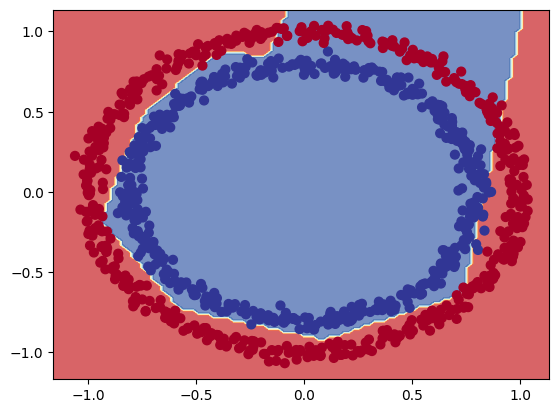

In [34]:
plot_decision_boundary(model_8,X,y)

# Create a toy tensor ( similar to our data  we passed into our model)

In [35]:
A = tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

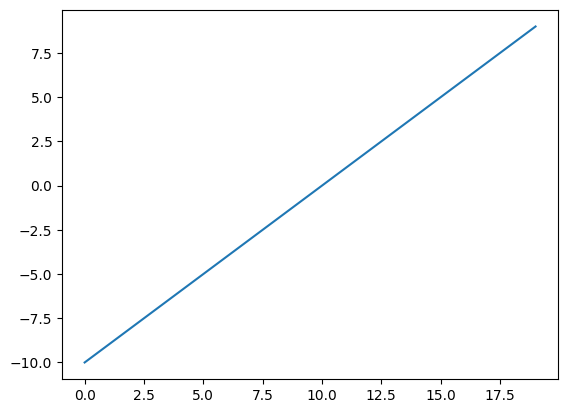

In [36]:
plt.plot(A)

In [37]:
# let's replicate our sigmoid activation function

def sigmoid(X):
    return 1 / (1 + tf.exp(-X))

sigmoid(X)

<tf.Tensor: shape=(1000, 2), dtype=float64, numpy=
array([[0.68010323, 0.55761316],
       [0.31948079, 0.5382399 ],
       [0.3067427 , 0.54321243],
       ...,
       [0.46582826, 0.30788798],
       [0.66158411, 0.31701982],
       [0.56980526, 0.72388687]])>

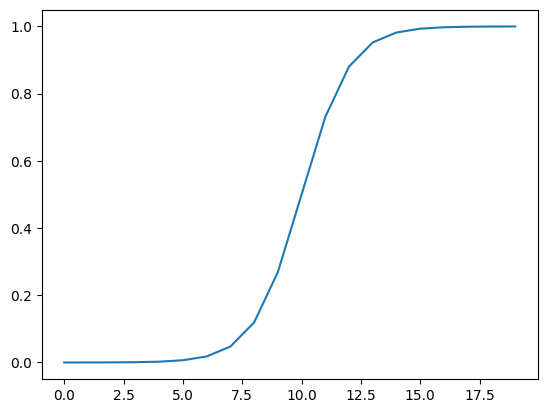

In [38]:
plt.plot(sigmoid(A))

In [39]:
# Lets recreate the Relu activation function
def relu(x):
    '''If the value is negetive it returns 0. If the value is Positive it returns 1'''
    return tf.maximum(0,x)
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

In [40]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

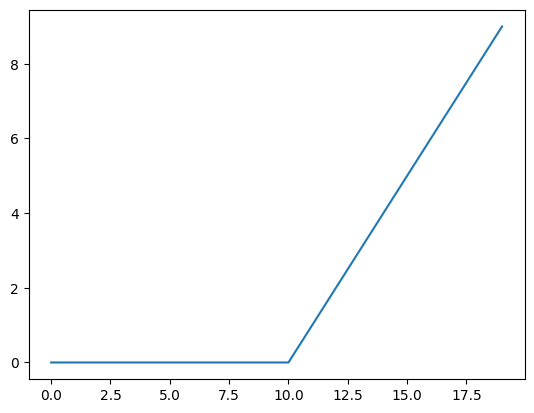

In [41]:
plt.plot(relu(A))

## Lets split our data into train and test set for validating the model performance

In [42]:
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [43]:
# Getting great results in less time by tweaking the learning rate

# set the random seed
tf.random.set_seed(42)

# 1. Create the Model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_9.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# Fit the model and save the results 
history = model_9.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 970us/step - loss: 0.7042 - accuracy: 0.4737
Epoch 2/25
25/25 [==============================] - 0s 825us/step - loss: 0.6919 - accuracy: 0.4988
Epoch 3/25
25/25 [==============================] - 0s 815us/step - loss: 0.6838 - accuracy: 0.5450
Epoch 4/25
25/25 [==============================] - 0s 852us/step - loss: 0.6761 - accuracy: 0.5838
Epoch 5/25
25/25 [==============================] - 0s 894us/step - loss: 0.6649 - accuracy: 0.5750
Epoch 6/25
25/25 [==============================] - 0s 877us/step - loss: 0.6490 - accuracy: 0.6175
Epoch 7/25
25/25 [==============================] - 0s 917us/step - loss: 0.6260 - accuracy: 0.7675
Epoch 8/25
25/25 [==============================] - 0s 748us/step - loss: 0.6037 - accuracy: 0.7375
Epoch 9/25
25/25 [==============================] - 0s 931us/step - loss: 0.5662 - accuracy: 0.7812
Epoch 10/25
25/25 [==============================] - 0s 813us/step - loss: 0.5271 - accuracy: 0.7987

In [44]:
model_9.evaluate(X_test,y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.0885 - accuracy: 0.9850


[0.08846882730722427, 0.9850000143051147]

313/313 [==============================] - 0s 444us/step


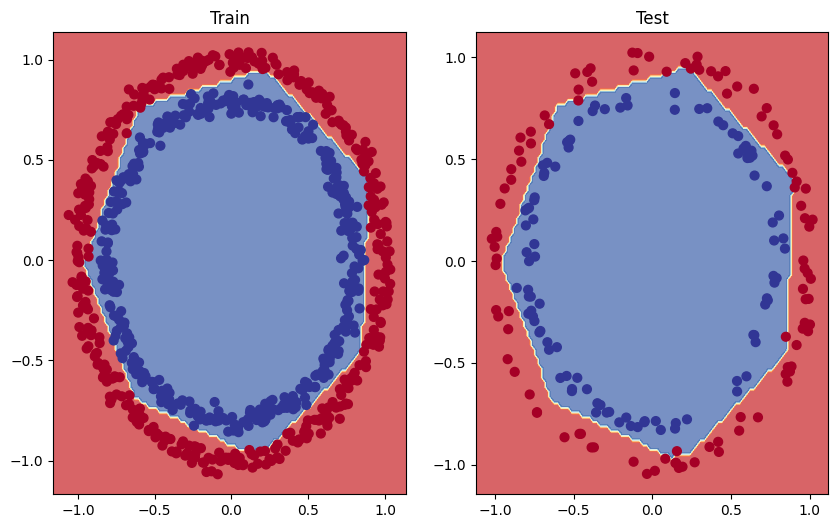

In [45]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_9,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_9,X_test,y_test)

### Lets Look into Our history object

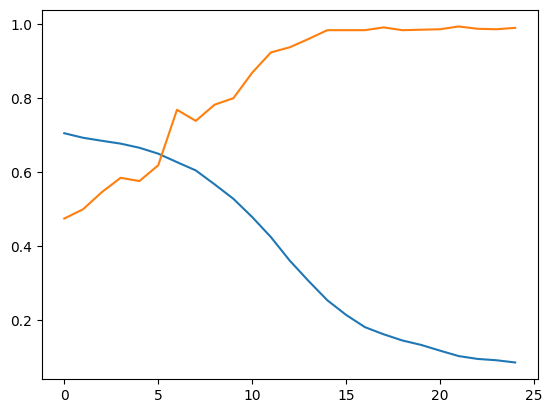

In [46]:
plt.plot(pd.DataFrame(history.history))

## Implementing a Learning rate callback

In [47]:
# set the random seed
tf.random.set_seed(42)

# 1. Create the model

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_10.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                 metrics=['accuracy'])

# 3. Create the learning rate callback
lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_10 = model_10.fit(X_train,y_train, epochs=100,
                          callbacks=[lr_schedular])

Epoch 1/100
25/25 [==============================] - 0s 786us/step - loss: 0.7100 - accuracy: 0.5063 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 703us/step - loss: 0.7096 - accuracy: 0.4950 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 702us/step - loss: 0.7092 - accuracy: 0.4787 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 658us/step - loss: 0.7087 - accuracy: 0.4913 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 625us/step - loss: 0.7082 - accuracy: 0.5113 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 585us/step - loss: 0.7078 - accuracy: 0.5138 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 612us/step - loss: 0.7072 - accuracy: 0.5138 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 589us/step - loss: 0.7068 - accuracy: 0.5125 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 

<Axes: xlabel='Epochs'>

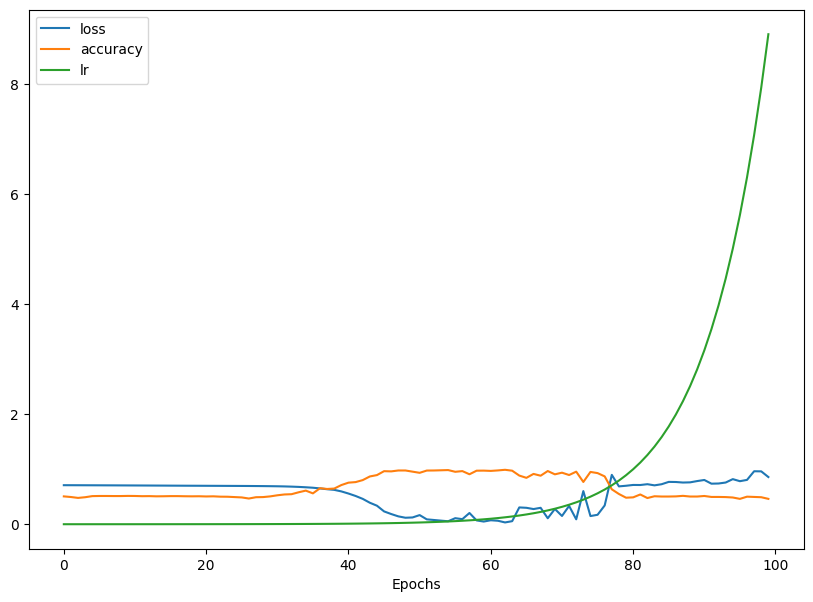

In [48]:
pd.DataFrame(history_10.history).plot(figsize=(10,7),xlabel="Epochs")

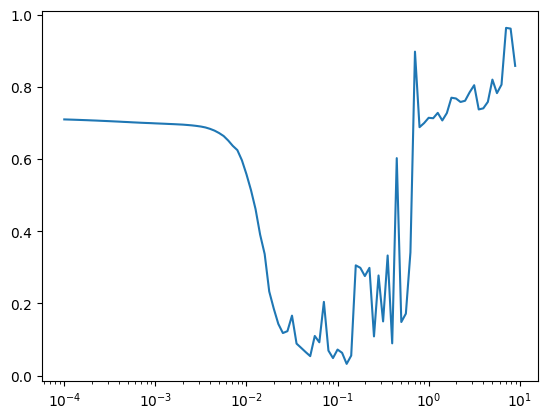

In [49]:
# Plot the learning rate vs the loss
lrs = 1e-4 * ( 10**(tf.range(100)/20))
plt.semilogx(lrs,history_10.history['loss'])

In [50]:
## Try to create a new model with new learning rate to check for accuracy 

# set the random seed
tf.random.set_seed(42)

# 1. Create the model

model_11 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile the model
model_11.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=['accuracy'])

# Fit the model
history_11 = model_11.fit(X_train,y_train,epochs=50)

Epoch 1/50
25/25 [==============================] - 0s 816us/step - loss: 0.6924 - accuracy: 0.4863
Epoch 2/50
25/25 [==============================] - 0s 679us/step - loss: 0.6857 - accuracy: 0.5225
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6776 - accuracy: 0.5600
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6569 - accuracy: 0.5938
Epoch 5/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6326 - accuracy: 0.6275
Epoch 6/50
25/25 [==============================] - 0s 896us/step - loss: 0.5671 - accuracy: 0.7362
Epoch 7/50
25/25 [==============================] - 0s 854us/step - loss: 0.4989 - accuracy: 0.7538
Epoch 8/50
25/25 [==============================] - 0s 882us/step - loss: 0.4464 - accuracy: 0.7950
Epoch 9/50
25/25 [==============================] - 0s 905us/step - loss: 0.3983 - accuracy: 0.8537
Epoch 10/50
25/25 [==============================] - 0s 888us/step - loss: 0.3235 - accuracy: 0.9150
Epoch

In [51]:
model_11.evaluate(X_test,y_test)

7/7 [==============================] - 0s 910us/step - loss: 0.0366 - accuracy: 0.9900


[0.0365595743060112, 0.9900000095367432]

313/313 [==============================] - 0s 418us/step


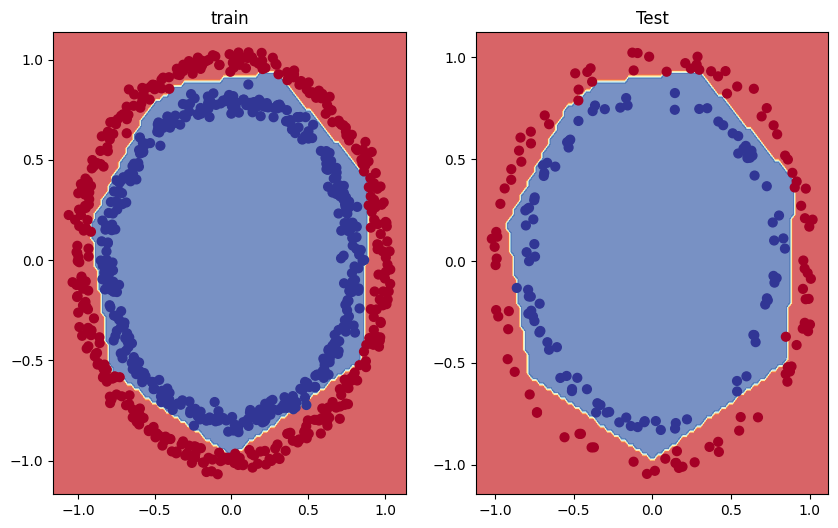

In [52]:
# PLot the decision boundary

plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_11,X_train,y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_11,X_test, y_test)

In [53]:
# Create a Confusion metric for our model predictions
y_pred_11 = model_11.predict(X_test)

7/7 [==============================] - 0s 640us/step


In [54]:
y_test

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0])

In [55]:
y_pred_11

array([[9.98367727e-01],
       [9.99627054e-01],
       [9.98387814e-01],
       [9.99759257e-01],
       [9.74811465e-02],
       [9.25666746e-03],
       [9.98287499e-01],
       [1.03144575e-05],
       [9.99843180e-01],
       [2.24656358e-01],
       [9.99802053e-01],
       [7.89287686e-01],
       [9.99945879e-01],
       [9.73104894e-01],
       [9.99159336e-01],
       [9.96013403e-01],
       [9.72453415e-01],
       [9.99026358e-01],
       [3.99530604e-02],
       [9.97542202e-01],
       [4.01072763e-03],
       [9.97232080e-01],
       [9.97534513e-01],
       [9.99770880e-01],
       [1.03976257e-01],
       [9.88209426e-01],
       [9.91988838e-01],
       [2.34892195e-06],
       [7.89001992e-04],
       [9.99721944e-01],
       [2.58947053e-04],
       [9.86611426e-01],
       [9.91882622e-01],
       [2.17800633e-07],
       [4.19896841e-03],
       [9.93601441e-01],
       [9.99951541e-01],
       [8.20484698e-01],
       [9.99994397e-01],
       [9.99778748e-01],


In [56]:
np.round(y_pred_11[5])

array([0.], dtype=float32)

In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,np.round(y_pred_11))

array([[99,  2],
       [ 0, 99]])

### The Confusion matrix we are about to write is a remix of scikit-learn's plot_confusion matrix

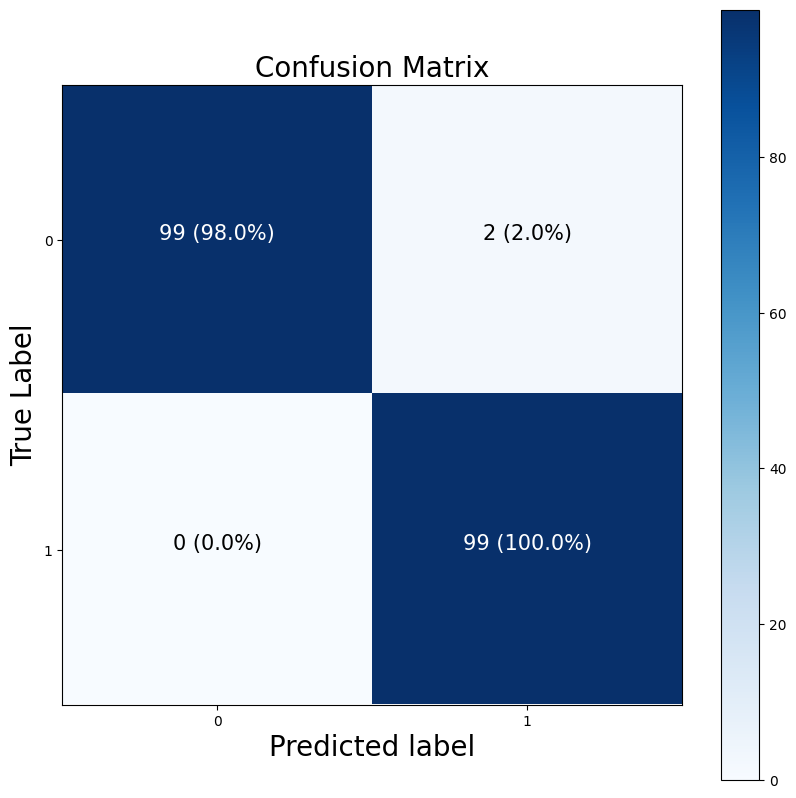

In [72]:
import itertools 

figsize = (10, 10)

# Create the confusion matrix
 
cm  = confusion_matrix(y_test,tf.round(y_pred_11))
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

# Lets preetify the Confusion matrix now.
fig, ax = plt.subplots(figsize=figsize)

# Create a Matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])

# Labels the axis
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set the X-axis labels to the bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust Label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# set the threshold for different colors
threshold = (cm.max() + cm.min()) / 2

# Plot some text on each cell
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)", horizontalalignment="center", color="white" if cm[i,j] > threshold else "black", size=15)

In [65]:
cm.shape[0]

2